<a href="https://colab.research.google.com/github/2101324/dl2022late/blob/main/CNN9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D
     

In [2]:

import keras
     

In [3]:

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [4]:
import numpy as np # importして、npという別名を設定
# 早期終了（Early Stopping）のためのライブラリをimport
import keras.callbacks as callbacks # callbacksという別名を設定

In [5]:

# 学習用データをx_trainとして作る
x_train = np.random.random((100, 6, 6, 1))
# 学習用データの正解をy_trainとして作る
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes = 10)
     

# テスト検証用データをx_testとして作る
# (6, 6, 1)の形を今度は20セット分
x_test = np.random.random((20, 6, 6, 1))
# テスト検証用データの正解をy_testとして作る
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes = 10)

In [6]:

model = Sequential()

In [7]:

# 畳み込み層追加
model.add(Conv2D(
    filters=3, # フィルター３パターン
    kernel_size=(3, 3), # 受容野のサイズ縦3, 横3
    kernel_initializer='lecun_uniform',
    input_shape=(6, 6, 1), # 入力データの形縦6, 横6
    name='Conv2D_1'
    ))

In [8]:

# 全結合層
model.add(Flatten(
    name='Flatten_1'
    ))
# softmaxで分類するニューロン層
model.add(Dense(units = 10, activation = 'softmax', name = 'Dense_1'))

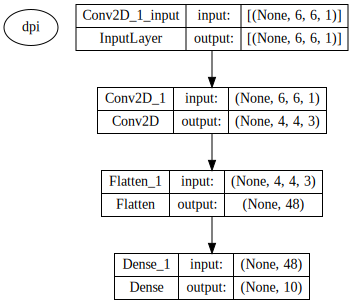

In [9]:
SVG(model_to_dot(model, show_shapes=True, dpi=None).create(prog='dot', format='svg'))

In [10]:
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', #損失を監視
                                        patience=5) #epoch5つ分様子を見る

In [11]:

model.compile(loss='mean_squared_error', #平均（mean）二乗（squared）誤差（error）
              optimizer='sgd' # パラメータの重みをSGDで最適化する
              # SGD = 確率的勾配降下法
              )
model.fit(x_train, y_train, # 学習データと答えデータ
          batch_size = 32, # 32個ずつまとめて学習（=バッチ学習）してから重みを調整する。
          epochs = 10, # バッチが終わったら重みを調整して学習しなおす。その回数。
          callbacks = [earlyStopping], # エポックの中で呼ぶcallback処理のリストに早期終了を追加
          validation_split = 0.2, # 学習データのうち2割を、学習中の自己評価検証に使う
          )

Epoch 1/10
3/3 [==============================] - 1s 110ms/step - loss: 0.0920 - val_loss: 0.0893
Epoch 2/10
3/3 [==============================] - 0s 16ms/step - loss: 0.0920 - val_loss: 0.0893
Epoch 3/10
3/3 [==============================] - 0s 12ms/step - loss: 0.0920 - val_loss: 0.0893
Epoch 4/10
3/3 [==============================] - 0s 12ms/step - loss: 0.0920 - val_loss: 0.0893
Epoch 5/10
3/3 [==============================] - 0s 13ms/step - loss: 0.0920 - val_loss: 0.0893
Epoch 6/10
3/3 [==============================] - 0s 12ms/step - loss: 0.0920 - val_loss: 0.0893
